In [1]:
from pathlib import Path

import numba as nb
import numpy as np
import scipy.stats as stats

from natsort import natsorted

import matplotlib.pyplot as plt


#plt.style.use("mike")
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')


import astropy.units as u

import cmasher as cmr

green = "#33FF86"
purple = "#CE33FF"

%matplotlib widget
from cosmogrb.universe.survey import Survey

import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from zusammen.stan_models.stan_model import get_model
from zusammen import AnalysisBuilder, DataSet
from zusammen.spectral_plot import display_posterior_model_counts

from threeML import update_logging_level

import arviz as av


update_logging_level("FATAL")


from astromodels import Band_Calderone, PointSource, Model


from threeML import JointLikelihood, DataList, display_spectrum_model_counts

from astromodels import Cutoff_powerlaw

import popsynth as ps

07:52:34 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=308005;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=361611;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=984209;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=531779;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=118259;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=501660;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

07:52:34 INFO      Starting 3ML!                                                                     ]8;id=613127;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=963617;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py#31\31]8;;\

         WARNING   no display variable set. using backend for graphics without display (agg)         ]8;id=283523;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=962417;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=502021;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=680658;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=324264;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=500152;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=673773;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=724750;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=643023;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=193085;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py#79\79]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=7387;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=156531;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=163463;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=468404;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=504591;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=711353;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=508814;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=426256;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py#341\341]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=665607;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=706446;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py#341\341]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=459375;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=170260;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor-3.8/lib/python3.8/site-packages/threeML/__init__.py#341\341]8;;\
                  performances in 3ML                                                                              

Import the survey and process the GRBs

In [ ]:
survey = Survey.from_file('data/survey.h5')
ab = AnalysisBuilder(survey, use_bb=True)

In [ ]:
ab.write_yaml("test_proc.yml")

In [2]:
ds = DataSet.from_yaml("test_proc.yml")

In [ ]:
ds.to_hdf5_file("sgrb.h5")

In [ ]:
ds.to_hdf5_file("sgrb.h5", sig_threshold=40)

In [ ]:
ds = DataSet.from_hdf5_file('sgrb.h5')

In [3]:
ds.to_stan_dict()

OrderedDict([('N_intervals', 2),
             ('N_grbs', 1),
             ('max_n_echan', 140),
             ('max_n_chan', 128),
             ('object_idx', array([1, 1])),
             ('grb_id', array([1, 1])),
             ('N_dets', [4, 4]),
             ('observed_counts',
              array([[[87., 47., 32., ...,  1.,  0., 14.],
                      [ 5.,  8.,  4., ...,  4.,  8., 14.],
                      [12.,  5.,  5., ...,  3., 19., 18.],
                      [ 2.,  6.,  6., ...,  1.,  4., 29.]],
              
                     [[23., 26., 35., ...,  1.,  0., 12.],
                      [ 2.,  1.,  2., ...,  7., 16., 16.],
                      [ 5., 11.,  3., ...,  1., 21., 23.],
                      [ 1.,  7.,  7., ...,  2.,  7., 36.]]])),
             ('background_counts',
              array([[[ 7.57752895, 23.0158577 , 20.46640968, ...,  0.49572626,
                        0.38949907, 16.35896301],
                      [ 1.20369768,  3.04464602,  2.47820067, .

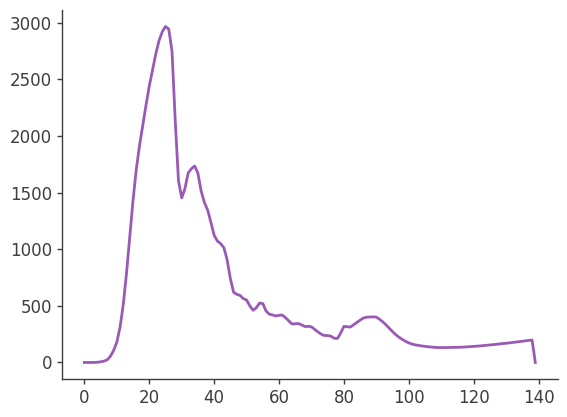

In [27]:
%matplotlib widget
i,j = 1,2
plt.plot(ds.to_stan_dict()["response"][i,j].T @ ds.to_stan_dict()['observed_counts'][i,j])

Make Stan model

In [28]:
m = get_model("cpl_simple_chunked_gc_relaxed")

In [29]:
m.clean_model()

In [30]:
m.build_model(opt_exp=True)

In [31]:
data = ds.to_stan_dict()

n_threads = 2
n_chains = 2

fit = m.model.sample(
    data=data,
    parallel_chains=n_chains,
    chains=n_chains,
    inits= {
        'alpha': -1 * np.ones(data['N_intervals']),
        'log_ec': 2 * np.ones(data['N_intervals']),
        #'gamma_sig_meta': .0001,
        #'log_Nrest_sig_meta': .0001,
        #'gamma_mu_meta': 1,
        #'log_Nrest_mu_meta': 52,
        'gamma': np.ones(data['N_grbs']),
        'log_Nrest': 52 * np.ones(data['N_grbs'])
    },
    threads_per_chain=n_threads,
    seed=1234,
    iter_warmup=1000,
    iter_sampling=500,
    max_treedepth=12,
    adapt_delta=0.9,
    show_progress=True,
    #show_console=True
)

07:48:28 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

07:49:10 - cmdstanpy - INFO - CmdStan done processing.
07:49:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate: error estimate of integral 3.84724e-05 exceeds the given relative tolerance times norm of integral (in '/Users/chrobin/Documents/zusammen/zusammen/stan_models/cpl_simple_chunked_gc_relaxed.stan', line 151, column 4 to column 105)
	Exception: integrate: error estimate of integral 4.68641e-05 exceeds the given relative tolerance times norm of integral (in '/Users/chrobin/Documents/zusammen/zusammen/stan_models/cpl_simple_chunked_gc_relaxed.stan', line 151, column 4 to column 105)
	Exception: integrate: error estimate of integral 1.46392e-06 exceeds the given relative tolerance times norm of integral (in '/Users/chrobin/Documents/zusammen/zusammen/stan_models/cpl_simple_chunked_gc_relaxed.stan', line 151, column 4 to column 105)
	Exception: integrate: error estimate of integral 4.02091e-06 exceeds the given relative tolerance times norm of integral

Import Stan results into arviz

In [ ]:
fit.diagnose()

In [32]:
res = av.from_cmdstanpy(fit)

In [ ]:
res.to_netcdf("inference_data/testing_fixed_gc_relaxed_single_2.nc")

In [ ]:
res = av.from_netcdf("inference_data/testing_fixed_gc_single_1.nc")

In [ ]:
res.sample_stats

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'log_ec'}>,
        <AxesSubplot:title={'center':'log_ec'}>],
       [<AxesSubplot:title={'center':'log_Nrest'}>,
        <AxesSubplot:title={'center':'log_Nrest'}>],
       [<AxesSubplot:title={'center':'gamma'}>,
        <AxesSubplot:title={'center':'gamma'}>],
       [<AxesSubplot:title={'center':'ec'}>,
        <AxesSubplot:title={'center':'ec'}>],
       [<AxesSubplot:title={'center':'log_epeak'}>,
        <AxesSubplot:title={'center':'log_epeak'}>],
       [<AxesSubplot:title={'center':'log_energy_flux'}>,
        <AxesSubplot:title={'center':'log_energy_flux'}>],
       [<AxesSubplot:title={'center':'energy_flux'}>,
        <AxesSubplot:title={'center':'energy_flux'}>],
       [<AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title={'center':'K'}>]], dtype=object)

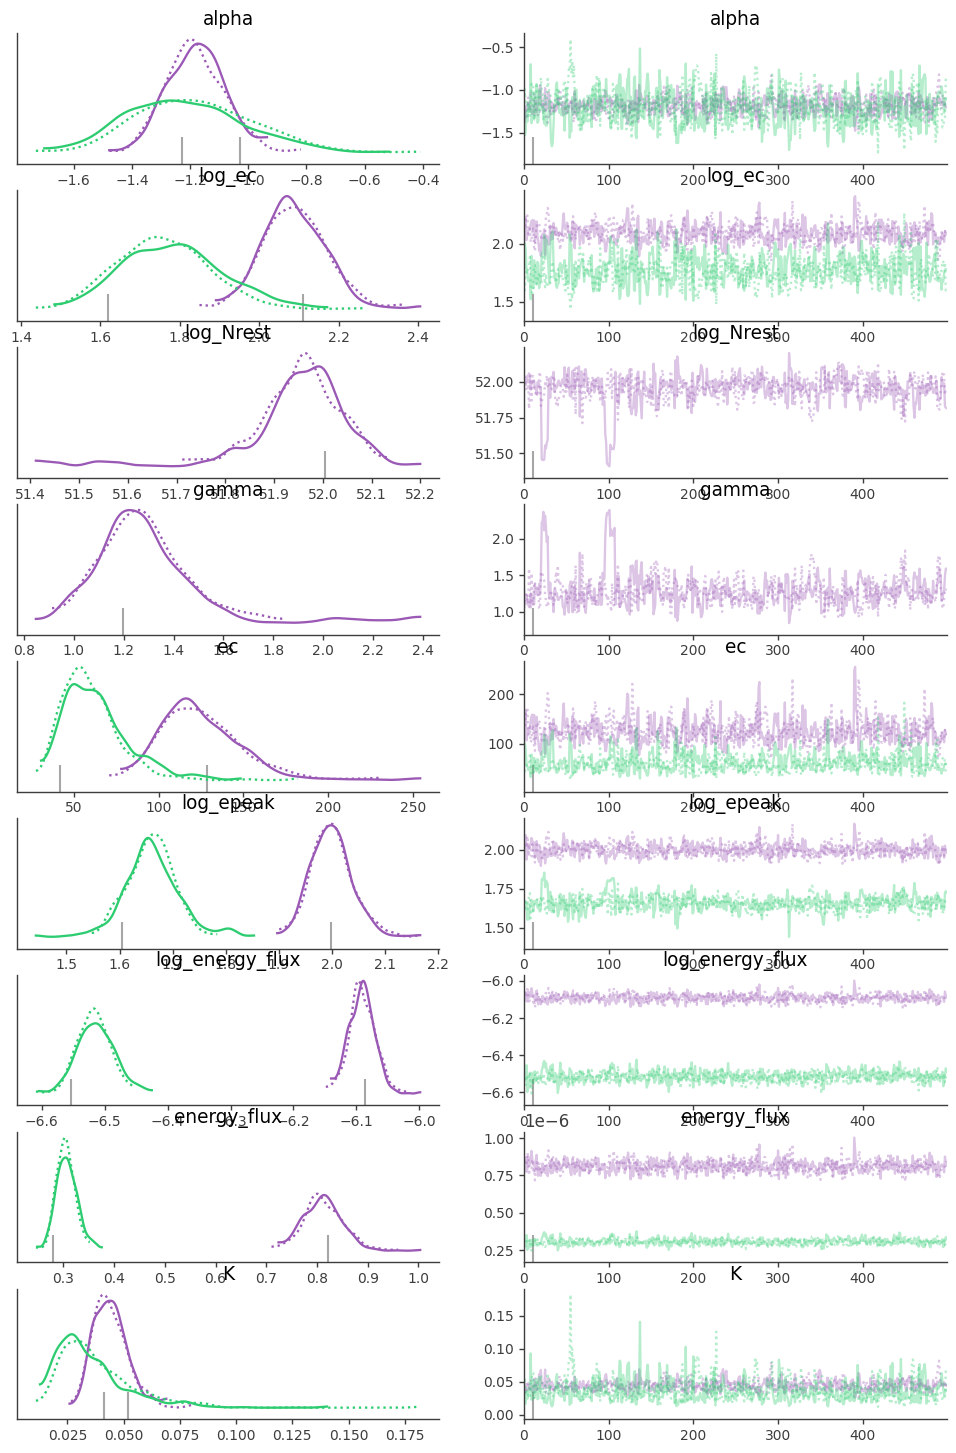

In [33]:
%matplotlib widget
av.plot_trace(res)

In [ ]:
%matplotlib widget
av.plot_pair(res, divergences=True)

Load parameters  
    $\alpha$: parameter of CPL  
    $E_p = \log E_c$  
    $K$: normalization

In [ ]:
id = 0


alpha = res.posterior.alpha.stack(sample=("chain", "draw")).values[id]

log_ec = res.posterior.log_ec.stack(sample=("chain", "draw")).values[id]

K  = res.posterior.K.stack(sample=("chain", "draw")).values[id]

log_epeak = res.posterior.log_epeak.stack(sample=("chain", "draw")).values[id]

energy_flux = res.posterior.energy_flux.stack(sample=("chain", "draw")).values[id]

gamma = res.posterior.gamma.stack(sample=("chain", "draw")).values[id]

log_Nrest = res.posterior.log_Nrest.stack(sample=("chain", "draw")).values[id]


div = res.sample_stats.diverging.stack(sample=("chain", "draw")).values

samples = np.vstack((K, alpha, 10.**log_ec))


dl = ds.get_data_list_of_interval(id)

In [ ]:
div.sum()

In [ ]:
bc = Cutoff_powerlaw(piv=100)

bc.index.bounds = (None, None)
bc.K.bounds = (None, None)
bc.xc.bounds = (None, None)

model = Model(PointSource("ps",0,0, spectral_shape=bc))

In [ ]:
%matplotlib widget
#fig, ax = plt.subplots()

plt.scatter(log_ec, alpha, alpha=0.1)

In [ ]:
fig, ax = plt.subplots()

ax.scatter(K, alpha, alpha=0.1)

In [ ]:
display_posterior_model_counts(
    dl[1], model, samples.T[::20], min_rate=1e-99, shade=False
)

In [ ]:
cpl = Cutoff_powerlaw(piv=100,K=1e-1,xc=200)


dl = ds.get_data_list_of_interval(2)

model = Model(PointSource("ps",0,0, spectral_shape=cpl))

ba = JointLikelihood(model,DataList(*dl))

In [ ]:
ba.fit()

In [ ]:
display_spectrum_model_counts(ba)

In [ ]:
dl[0].view_count_spectrum()

In [ ]:
cpl